# Job Application Process 

In [160]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [161]:
# Data upload
data = pd.read_csv('Job Applications - Applications.csv')

data.head()

,App ID,Company,Type,Position,City,Date Applied,Status,Interviewed
0,1,Accenture,Consulting,Data Scientist,Atlanta,8/27/2022,No Reply,No
1,2,Accenture,Consulting,Data Science Consultant,Atlanta,8/27/2022,Removed,No
2,3,Accenture,Consulting,Entry Level Analyst Development Programs,Nashville/Atlanta,9/28/2022,Rejected,No
3,4,Accenture,Consulting,Technical Architecture Delivery Analyst,Atlanta,11/6/2022,No Reply,No
4,5,Accenture,Consulting,Data Architect,Atlanta,11/6/2022,No Reply,No


In [162]:
data2 = pd.read_csv('Job Applications - Sheet5.csv')
data2.head()

,Date Applied,Count
0,8/8/2022,1
1,8/9/2022,0
2,8/10/2022,0
3,8/11/2022,0
4,8/12/2022,0


In [163]:
# Convert date to datetime
data['Date Applied'] = pd.to_datetime(data['Date Applied '])

In [164]:
status_counts = data.Status.value_counts()
status_counts

No Reply    57
Rejected    26
Removed      4
Offered      2
Ghosted      2
Name: Status, dtype: int64

In [165]:
interview_counts = data.Interviewed.value_counts()
interview_counts

No     85
Yes     6
Name: Interviewed, dtype: int64

In [166]:
type_counts = data.Type.value_counts()
type_counts = pd.DataFrame({'Industry':type_counts.index, 'Frequency':type_counts.values})
type_counts = type_counts.sort_values(by=['Frequency'])
type_counts

,Industry,Frequency
4,Sports,1
5,Real Estate,1
6,Media,1
7,Healthcare,1
3,Financial Services,6
2,Technology,10
1,Transportation,12
0,Consulting,59


In [167]:
city_counts = data.City.value_counts()
city_counts

Atlanta              64
Nashville            15
Nashville/Atlanta     6
Remote                5
Charlotte             1
Name: City, dtype: int64

In [168]:
tot_apps = status_counts.sum()
print("Total Applications: ", tot_apps)

Total Applications:  91


In [169]:
data2['Date Applied'] = pd.to_datetime(data2['Date Applied '])

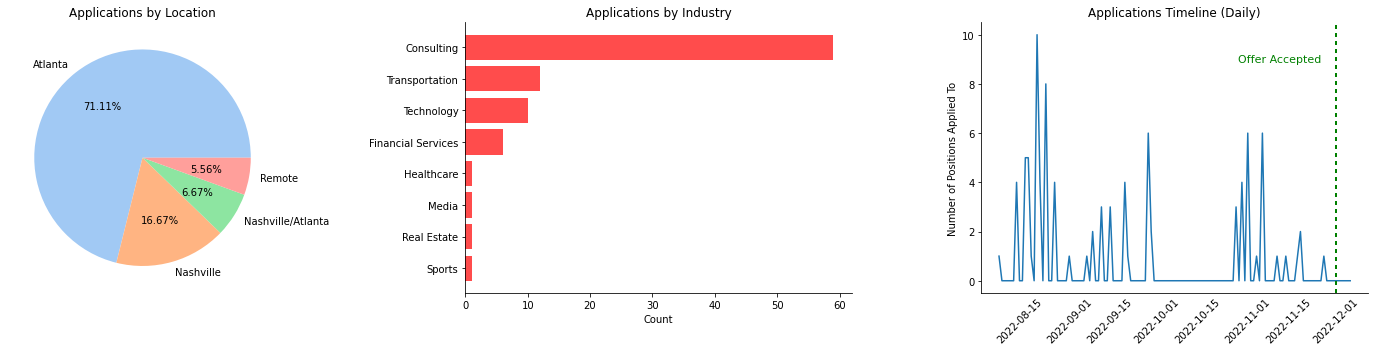

In [175]:

# Create a figure with a 3x1 subplot grid
fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharex=False, sharey=False)

# Plot something in each subplot
data = [64, 15, 6, 5]
labels = ['Atlanta', 'Nashville', 'Nashville/Atlanta', 'Remote']
colors = sns.color_palette('pastel')[0:5]
axs[0].pie(data, labels = labels, colors = colors, autopct='%.2f%%')
axs[0].set_title("Applications by Location")

axs[1].barh(type_counts['Industry'], type_counts['Frequency'], color="red", alpha=0.70)
axs[1].set_title("Applications by Industry")
axs[1].set_xlabel("Count")
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)

axs[2].plot(data2['Date Applied'], data2['Count'])
axs[2].tick_params(axis='x', labelrotation=45, length=0)
axs[2].spines['right'].set_visible(False)
axs[2].spines['top'].set_visible(False)
axs[2].set_title("Applications Timeline (Daily)")
axs[2].set_ylabel("Number of Positions Applied To")
axs[2].axvline(x=dt.datetime(2022,12,1), ymin=0, ymax=1, color='green', linewidth=2.0, dashes=[2,2])
axs[2].annotate("Offer Accepted", 
                   ha = 'center', va = 'center', color='green',
                   size=11,
                   xy = (dt.datetime(2022,11,12), 9))


# Show the plot
plt.tight_layout()
plt.savefig('3-chart.png', transparent = False)
plt.show()

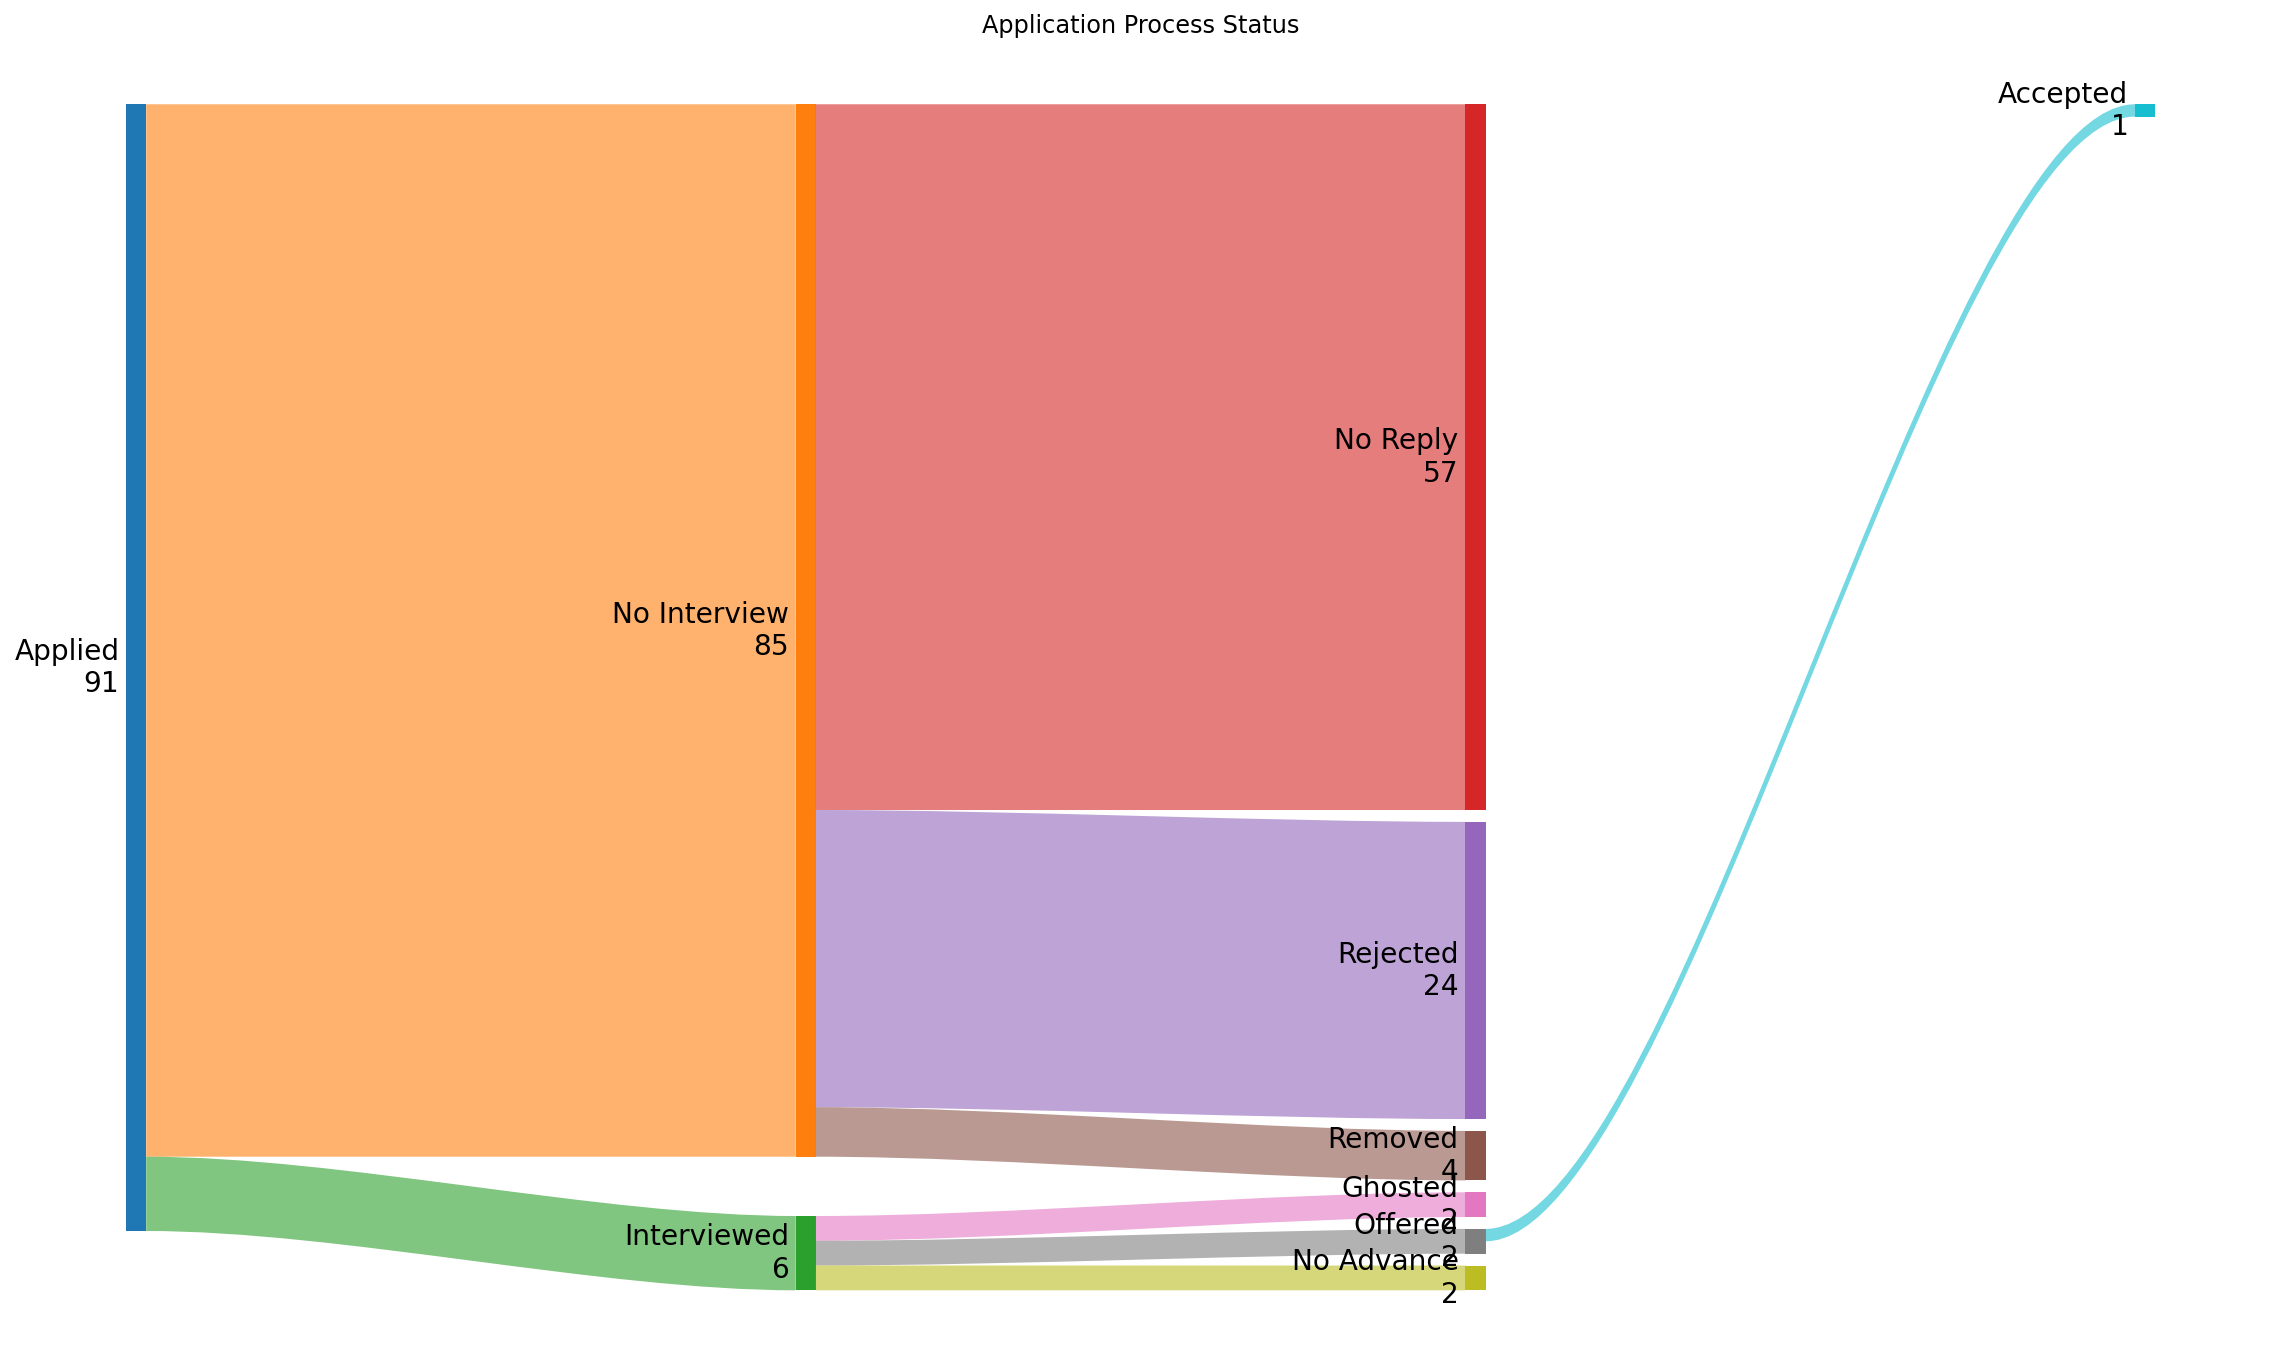

In [174]:
from sankeyflow import Sankey

nodes = [
    [('Applied', 91)],
    [('No Interview', 85), ('Interviewed', 6)],
    [('No Reply', 57), ('Rejected', 24), ('Removed', 4), ('Ghosted', 2), ('Offered', 2), ('No Advance', 2)],
    [('Accepted', 1)]
]
flows = [
    ('Applied', 'No Interview', 85),
    ('Applied', 'Interviewed', 6),
    ('Interviewed', 'Ghosted', 2),
    ('Interviewed', 'Offered', 2),
    ('Interviewed', 'No Advance', 2),
    ('No Interview', 'No Reply', 57),
    ('No Interview', 'Rejected', 24),
    ('No Interview', 'Removed', 4),
    ('Offered', 'Accepted', 1),
] 

plt.figure(figsize=(20, 12), dpi=144)
plt.title("Application Process Status")
s = Sankey(flows=flows, nodes=nodes)
s.draw()
plt.savefig('app-sankey.png', transparent = False)